In [1]:
%load_ext IPython.extensions.autoreload
%autoreload 2

In [2]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime as dt

from data import FinData
from preprocessing import train_valid_split
from model import CatboostFinModel

c:\Users\burko\OneDrive\Documents\GitHub\prices-predictions\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data = FinData("../datasets/T_yandex_10min.csv")

data.insert_all()
data.make_binary_class_target()

In [4]:
data.cat_features

['hours', 'day', 'minute', 'is_holiday', 'pred_holiday', 'week_pred_holiday']

In [43]:
numeric = data.numeric_features[::5] + data.numeric_features[1::5]

cat = data.cat_features

args = {"iterations" : 10000, 
        "depth" : 5, 
        "learning_rate" : 0.01, # тут слегка неадекватные параметры, которые можно менять 
        "use_best_model" : True, 
        "l2_leaf_reg" : 200,
        "verbose" : 100, # отчет каждые 100 итераций 
        "loss_function" : 'CrossEntropy', 
        "eval_metric" : 'Accuracy', 
        "cat_features" : cat, 
        "random_state" : 42,
        "early_stopping_rounds" : 5000}

# data.restrict_time_down(2024, 11, 1)

In [47]:
X_train, X_val, y_train, y_val = train_valid_split(data=data.df, 
                                                   year=2024, month=12, day=5, 
                                                   numeric=numeric, cat=cat, target="direction_binary")

In [48]:
model = CatboostFinModel(args)

model.set_datasets(X_train, X_val, y_train, y_val)
model.set_features(numeric, cat)

model.fit()

0:	learn: 0.5537687	test: 0.6060606	best: 0.6060606 (0)	total: 96.5ms	remaining: 16m 4s
100:	learn: 0.5559363	test: 0.5858586	best: 0.6111111 (1)	total: 10.7s	remaining: 17m 32s
200:	learn: 0.5581560	test: 0.5909091	best: 0.6111111 (1)	total: 23.2s	remaining: 18m 50s
300:	learn: 0.5596606	test: 0.5959596	best: 0.6111111 (1)	total: 35.3s	remaining: 18m 58s
400:	learn: 0.5609046	test: 0.5959596	best: 0.6111111 (1)	total: 46.6s	remaining: 18m 35s
500:	learn: 0.5617761	test: 0.5909091	best: 0.6111111 (1)	total: 58s	remaining: 18m 20s
600:	learn: 0.5632211	test: 0.5909091	best: 0.6111111 (1)	total: 1m 11s	remaining: 18m 36s
700:	learn: 0.5645545	test: 0.5909091	best: 0.6111111 (1)	total: 1m 22s	remaining: 18m 20s
800:	learn: 0.5657388	test: 0.5909091	best: 0.6111111 (1)	total: 1m 35s	remaining: 18m 16s
900:	learn: 0.5674148	test: 0.5959596	best: 0.6111111 (1)	total: 1m 47s	remaining: 18m 7s
1000:	learn: 0.5685246	test: 0.5959596	best: 0.6111111 (1)	total: 1m 59s	remaining: 17m 54s
1100:	lea

Посмотрим на фильтр Баттерворта

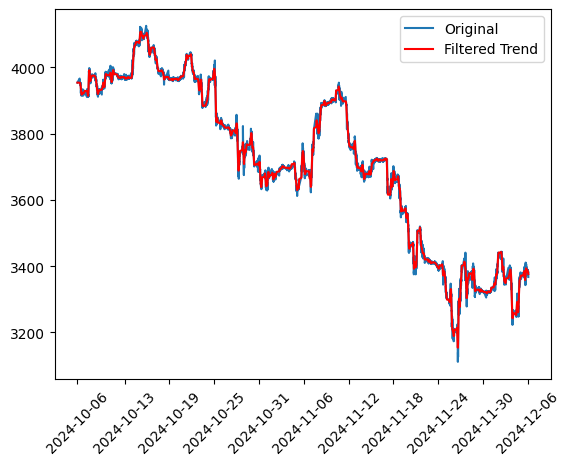

In [ ]:
data2 = FinData("../datasets/T_yandex_10min.csv")

data2.insert_shifts_norms([3, 6, 18])
data2.insert_rolling_means()
data2.insert_exp_rolling_means()
data2.insert_stochastic_oscillator()
data2.insert_high_low_diff()
data2.insert_butter_filter()
data.insert_trend_rsi()

data2.make_binary_class_target()


In [107]:
numeric = data2.numeric_features

cat = data2.cat_features

args = {"iterations" : 10000, 
        "depth" : 5, 
        "learning_rate" : 0.01, # тут слегка неадекватные параметры, которые можно менять 
        "use_best_model" : True, 
        "l2_leaf_reg" : 200,
        "verbose" : 100, # отчет каждые 100 итераций 
        "loss_function" : 'CrossEntropy', 
        "eval_metric" : 'Accuracy', 
        "cat_features" : cat, 
        "random_state" : 42,
        "early_stopping_rounds" : 5000}

X_train, X_val, y_train, y_val = train_valid_split(data=data2.df, 
                                                   year=2024, month=12, day=5, 
                                                   numeric=numeric, cat=cat, target="direction_binary")

model = CatboostFinModel(args)

model.set_datasets(X_train, X_val, y_train, y_val)
model.set_features(numeric, cat)

model.fit()


0:	learn: 0.6041560	test: 0.5656566	best: 0.5656566 (0)	total: 5.49ms	remaining: 54.9s
100:	learn: 0.6056890	test: 0.6010101	best: 0.6262626 (4)	total: 489ms	remaining: 48s
200:	learn: 0.6102879	test: 0.5959596	best: 0.6262626 (4)	total: 951ms	remaining: 46.4s
300:	learn: 0.6235735	test: 0.5858586	best: 0.6262626 (4)	total: 1.49s	remaining: 48.1s
400:	learn: 0.6303866	test: 0.5909091	best: 0.6262626 (4)	total: 2.04s	remaining: 48.9s
500:	learn: 0.6361778	test: 0.5909091	best: 0.6262626 (4)	total: 2.49s	remaining: 47.3s
600:	learn: 0.6390734	test: 0.5858586	best: 0.6262626 (4)	total: 3.03s	remaining: 47.4s
700:	learn: 0.6436723	test: 0.5959596	best: 0.6262626 (4)	total: 3.52s	remaining: 46.7s
800:	learn: 0.6484415	test: 0.5858586	best: 0.6262626 (4)	total: 3.97s	remaining: 45.6s
900:	learn: 0.6523591	test: 0.5858586	best: 0.6262626 (4)	total: 4.41s	remaining: 44.6s
1000:	learn: 0.6561063	test: 0.5858586	best: 0.6262626 (4)	total: 4.87s	remaining: 43.8s
1100:	learn: 0.6613865	test: 0.585

In [ ]:
data2.restrict_time_down_stupidly()
data2.insert_butter_filter(visualise=True)